In [124]:
import pybroker as pyb
from datetime import datetime
from pybroker import ExecContext, Strategy, YFinance, StrategyConfig, portfolio, context
import talib
from datetime import datetime , timedelta
import pandas as pd
import numpy as np

pyb.enable_data_source_cache('rebalancing')
#p = portfolio.Portfolio(10000)
config = StrategyConfig(initial_cash=30000)






In [125]:
all_secs = ['AMAT', 'ASML', 'DMLP', 'EXPD', 'EXPI', 'INMD', 'LSTR', 'LULU', 'META', 'MSB', 'MSFT', 'RVLV', 'SIMO', 'SMLR', 'STKS', 'TER', 'VALE', 'ULTA', "INTC",
    "MSFT","TXN","AMD","HPQ","GE" ,"IBM" ,"CGNX","COHU","ADSK","AMAT","QQQ", "SHY", "PSQ","QQQ", "SHY", "PSQ" , "QLD" ,"SPY" ,'SHY','TECL','SOXL','FAS','TQQQ', 'UPRO', 'TMF', 'USDU','SQQQ', 'TBF' , 'IEI', 'GLD', 'TIP', 'BSV']



qld_simple_secs =  ["QQQ", "SHY", "PSQ"]

jesse_secs = ['AMAT', 'ASML', 'DMLP', 'EXPD', 'EXPI', 'INMD', 'LSTR', 'LULU', 'META', 'MSB', 'MSFT', 'RVLV', 'SIMO', 'SMLR', 'STKS', 'TER', 'VALE', 'ULTA']

old_tech_secs = ["INTC", "MSFT" , "COHU","CGNX" , "AMD" , "ADSK" ,"AMAT","TXN","IBM","GE", "HPQ"]


In [126]:
common_secs = set(jesse_secs).intersection(set(old_tech_secs))

In [127]:

secs = ['GE','ADSK','EXPD',
 'LSTR',
 'QQQ',
 'SHY',
 'EXPI',
 'DMLP',
 'RVLV',
 'TER',
 'LULU',
 'IBM',
 'ULTA',
 'MSFT',
 'INTC',
 'ASML',
 'INMD',
 'VALE',
 'SMLR',
 'META',
 'MSB',
 'SIMO',
 'AMD',
 'STKS',
 'AMAT',
 'COHU',
 'CGNX',
 'TXN',
 'PSQ',
 'HPQ']

In [128]:
unique_secs = list(set(all_secs))

In [129]:
cur_secs = qld_simple_secs + jesse_secs

In [130]:
cur_secs

['QQQ',
 'SHY',
 'PSQ',
 'AMAT',
 'ASML',
 'DMLP',
 'EXPD',
 'EXPI',
 'INMD',
 'LSTR',
 'LULU',
 'META',
 'MSB',
 'MSFT',
 'RVLV',
 'SIMO',
 'SMLR',
 'STKS',
 'TER',
 'VALE',
 'ULTA']

In [131]:
rsi_10 = pyb.indicator('rsi_10', lambda data: talib.RSI(data.close, timeperiod=10))

mva_200 = pyb.indicator("mva_200", lambda data : talib.SMA(data.close , timeperiod=200))
mva_20 =  pyb.indicator("mva_200", lambda data : talib.SMA(data.close , timeperiod=20))


def get_mva(df, w):

# Calculate the daily returns
 df['Daily Return'] = df['close'].pct_change()

# Calculate the 60-day moving average return
 df['mva'] = df['Daily Return'].rolling(window=w).mean()

# Print the DataFrame with the calculated values
 return df[["date", "mva"]]


bnd_start_date_old_tech = start_date_temp - timedelta(days=120)
# Convert end date to string format

bnd_start_date_old_tech = bnd_start_date_old_tech.strftime("%m/%d/%Y")

old_tech_secs = ["INTC", "MSFT" , "COHU","CGNX" , "AMD" , "ADSK" ,"AMAT","TXN","IBM","GE", "HPQ"]

stock_data = {}
mva_ot = {}
for s in securities:
    data = yf.query(s,bnd_start_date , end_date)
    stock_data[s] = data 
    mva_ot[s] = get_mva(data,60)

    



#securities =  ['AMAT', 'ASML', 'DMLP', 'EXPD', 'EXPI', 'INMD', 'LSTR', 'LULU', 'META', 'MSB', 'MSFT', 'RVLV', 'SIMO', 'SMLR', 'STKS', 'TER', 'VALE', 'ULTA']

start_date = "01/01/20"
end_date = "01/01/23"

yf = YFinance()
start_date_temp = datetime.strptime(start_date, "%m/%d/%y")

# Convert start date string to datetime object

# Add 60 days

spy_start_date = start_date_temp - timedelta(days=250)

psq_start_date = start_date_temp - timedelta(days=30)
# simple_qld

rsis_10 = {}
for s in qld_simple_secs[1:]:
    data =  yf.query(s, psq_start_date, end_date)
    rsis_10[s] = rsi_10(data)


spy = yf.query("SPY", spy_start_date, end_date)

qqq = yf.query("QQQ", psq_start_date, end_date)

qqq_sma = mva_20(qqq)
spy_sma = mva_200(spy)

rsis = {}
for s in qld_simple_secs:
    data = yf.query(s, psq_start_date, end_date)

    rsis[s] = rsi_10(data)







    



Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.



In [132]:
# jesse 
rsi_40 = pyb.indicator('rsi_40', lambda data: talib.RSI(data.close, timeperiod=30))



start_date = "01/01/20"
end_date = "01/01/23"
yf = YFinance()
start_date_temp = datetime.strptime(start_date, "%m/%d/%y")

# Convert start date string to datetime object

# Add 60 days

vixm_start_date = start_date_temp - timedelta(days=81)
rsis_jesse = {}
for s in jesse_secs:
    data = yf.query(s, vixm_start_date, end_date)

    rsis_jesse[s] = rsi_40(data)


Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.



In [133]:

def get_mva(df, w):

# Calculate the daily returns
 df['Daily Return'] = df['close'].pct_change()

# Calculate the 60-day moving average return
 df['mva'] = df['Daily Return'].rolling(window=w).mean()

# Print the DataFrame with the calculated values
 return df[["date", "mva"]]




In [134]:
# old_tech



bnd_start_date = start_date_temp - timedelta(days=120)
# Convert end date to string format

bnd_start_date = bnd_start_date.strftime("%m/%d/%Y")

securities = ["INTC", "MSFT" , "COHU","CGNX" , "AMD" , "ADSK" ,"AMAT","TXN","IBM","GE", "HPQ"]

stock_data = {}
mva = {}
for s in securities:
    data = yf.query(s,bnd_start_date , end_date)
    stock_data[s] = data 
    mva[s] = get_mva(data,60)

    

    









Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.



In [135]:
set_inital_allocations_ot =  {
    "INTC" : 0.07*0.33,
    "MSFT" : 0.07*0.33,
    "TXN" :  0.07*0.33,
    "AMD" :  0.07*0.33,
    "HPQ" :  0.07*0.33,
    "GE" :   0.07*0.33,
    "IBM" :  0.07*0.33,
    "CGNX" : 0.00,
    "COHU" : 0.00,
    "ADSK" : 0.00,
    "AMAT" : 0.00

}

start_0 = start_date_temp - timedelta(days=2)
# Convert end date to string format

start_0 = start_0.strftime("%Y-%m-%d")

mv_0 = {}
for k,m in mva.items():
    df = mva[k]
    mv = df[df["date"]==start_0]["mva"].values[0]
    mv_0[k] = mv

mv_0 = dict(sorted(mv_0.items(), key=lambda x: x[1], reverse=True))

to_buy = list(mv_0.keys())[:3]

for t in to_buy:
    set_inital_allocations_ot[t]+=0.17*0.33
    











print(start_0)







2019-12-30


In [136]:
sum(set_inital_allocations_ot.values())

0.33

In [145]:
import pandas as pd
weights = pd.read_csv("../new_weights_60.csv")

In [146]:
weights = weights.set_index("date")

In [147]:
weights

,mva_qld_simple_60,mva_jesse_60,mva_old_tech_60
date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN
...,...,...,...
2022-12-23,0.301637,0.352576,0.345787
2022-12-27,0.300570,0.352117,0.347313
2022-12-28,0.308096,0.350047,0.341857


In [140]:
weights[weights < 0].count()

mva_qld_simple_20    0
mva_jesse_20         0
mva_old_tech_20      0
dtype: int64

In [149]:
trigs = []

cur2=[]
dates=[]
TOTAL =[]
trade_exec = {}
    #print(((ctxs["TSLA"]._curr_date)))
def shell(ctxs:dict[str, ExecContext]):
    #print(ctxs)
    pass 
    

def buy_low(ctxs: dict[str, ExecContext]):
    # If shares were already purchased and are currently being held, then return.
    # simple_qld 
    triggered = False 

    dt = tuple(ctxs.values())[0].dt
    date_object = datetime.strptime(str(dt), "%Y-%m-%d %H:%M:%S")

# Convert datetime object to the desired format
    dt2 = date_object.strftime("%Y-%m-%d")
    st0 = start_date_temp.strftime("%Y-%m-%d")
    st0 = str(st0)
    print(dt2)
    #print(dt2)

    weight_qld = weights.loc[dt2].mva_qld_simple_60

    if str(weight_qld) == "nan":
        weight_qld =  0.33

    expected_alloc_qld = {}


    for s in qld_simple_secs:
     expected_alloc_qld[s] = 0.0

    if spy_sma.loc[dt2] <  spy[spy["date"]==dt2]["open"].values[0]:
      #print(spy_sma)
      expected_alloc_qld['QQQ'] = 1.0  * weight_qld

    else:
     #print("Here")
     if qqq_sma.loc[dt2]  > qqq[qqq["date"]==dt2]["open"].values[0]:
        
        rsi_shy = rsis_10["SHY"].loc[dt2]
        rsi_psq = rsis_10["PSQ"].loc[dt2]

        if rsi_shy > rsi_psq:
            expected_alloc_qld["SHY"] = 1.0 * weight_qld
        else:
            expected_alloc_qld["PSQ"] = 1.0 * weight_qld

     else:
         expected_alloc_qld["QQQ"] = 1.0 * weight_qld
      
    print(expected_alloc_qld)
    if dt2 == "2020-01-02":
       #print("DT2 " ,dt2)

       cur_alloc_qld = {e:0 for e in qld_simple_secs}

       for c in cur_alloc_qld.keys():    # fix it 
          if cur_alloc_qld [c] > 0:
             shares_init = ctxs[c].calc_target_shares(cur_alloc_qld[c]) 
             ctxs[c].buy_shares = shares_init 



    else:
        total_eq = 0
        cur_alloc_qld = {}
        #position_x=0
        #totals=[]
        for s in qld_simple_secs:
            #totals.append(ctxs[s].total_equity)

            #print("Here man !!!!!")
            pos =ctxs[s].long_pos()
        
            if pos:
                positions_x = pos.shares 
               # print("XXXXXXXXXX" ,pos.shares)
        
            else:
                positions_x = 0
            #print(total_eq)
            print("positions is " , positions_x)
            total_eq  += ctxs[s].open[0] * float(positions_x)
            

        TOTAL.append(total_eq)
        print("Total is ", total_eq)
        for se in qld_simple_secs:
            pos =ctxs[se].long_pos()

            if pos:
                positions_x = pos.shares 
            else:
                positions_x = 0
            
            print(positions_x)
 
            ca = (ctxs[se].open[0] * float(positions_x)) / float(total_eq)

            cur_alloc_qld[se] = ca

        #totalss.append(totals)
    print("It is" , cur_alloc_qld)
    #cout=
    for ct in qld_simple_secs:
     #print("Val is ", abs(expected_alloc[ct] - cur_alloc[ct]) )
      #cout+=1
      #print("Cout ", cout
      
      if abs(expected_alloc_qld[ct] - cur_alloc_qld[ct])  >= 0.12:

        triggered= True 
        #print("Val is " , abs(expected_alloc[ct] - cur_alloc[ct])  )
        break

        #print("triggered")
    


    if triggered:
        #trigs.append("x")
        dates.append(dt2)

        buys =  {}
        sells = {}

        for e in expected_alloc_qld.keys():
            shares = ctxs[e].calc_target_shares(expected_alloc_qld[e])
            pos = ctxs[e].long_pos()

            if not pos: 
              ctxs[e].buy_shares = shares
              buys[e] = shares
            elif pos.shares < shares:
               ctxs[e].buy_shares = shares - pos.shares
               buys[e] = shares - pos.shares
               #buyquant.append(shares - pos.shares)
            else:
               ctxs[e].sell_shares = pos.shares - shares
               sells[e] = float(pos.shares - shares)
               #sellquant.append(shares - pos.shares)

        #trade_exec[dt2] = {"buy" : buys, "sells" : sells}

    else:

        pass


# jesse
    triggered_jesse = False
    weight_jesse = weights.loc[dt2].mva_jesse_60
    if str(weight_jesse) == "nan":
        weight_jesse = 0.33
    expected_alloc_jesse = {}
 

    for s in jesse_secs:
     expected_alloc_jesse[s] = 0.0
    #print(expected_alloc_jesse)

    rsi_1 = {}
    for k,m in rsis_jesse.items():
      df = rsis_jesse[k]
    #print(df)
      #print(k)

      rs_ = df.loc[dt2]
      rsi_1[k] = rs_

    rsi_1 = dict(sorted(rsi_1.items(), key=lambda x: x[1]))
    #print(rsi_1)

    to_buy = list(rsi_1.keys())[:7]

    for t in to_buy:
      expected_alloc_jesse[t]+=0.142857143*weight_jesse
      
    #print(expected_alloc_jesse)
    if dt2 == "2020-01-02":
       #print("DT2 " ,dt2)

       cur_alloc_jesse = {j:0 for j in jesse_secs }

       

    else:
        cur_alloc_jesse = {}
        #position_x=0
        for s in jesse_secs:
            pos =ctxs[s].long_pos()
            if pos:
                positions_x = pos.shares 
            else:
                positions_x = 0
        

            ca = (ctxs[s].open[0] * float(positions_x)) / float(ctxs[s].total_equity)
            cur_alloc_jesse[s] = ca
     
    #print(cur_alloc_jesse)
    cout=0
    for ct in jesse_secs:
     #print("Val is ", abs(expected_alloc[ct] - cur_alloc[ct]) )
      
        val = abs(expected_alloc_jesse[ct] - cur_alloc_jesse[ct]) 
      
        if val >= 0.08:

         triggered_jesse= True 
        #print("Val is " , abs(expected_alloc[ct] - cur_alloc[ct])  )
         break

        #print("triggered")
    


    if triggered_jesse:
        #trigs.append("x")
        dates.append(dt2)
        
        buys= {}
        sells = {}

        for e in expected_alloc_jesse.keys():
            shares = ctxs[e].calc_target_shares(expected_alloc_jesse[e])
            pos = ctxs[e].long_pos()
            if e not in common_secs:


                if not pos: 
                 ctxs[e].buy_shares = shares
                
                elif pos.shares < shares:
                 ctxs[e].buy_shares = shares - pos.shares
                
                else:
                 ctxs[e].sell_shares = pos.shares - shares  
               
       
    
    else:

        print("not triggered")
    
    # old_tech 
    triggered_ot = False
    weight_ot = weights.loc[dt2].mva_old_tech_60
    if str(weight_ot) == "nan":
        weight_ot = 0.33
    if dt2 == "2020-01-02":
       #print(dt2)
       for s in set_inital_allocations_ot.keys():
          shares = ctxs[s].calc_target_shares(set_inital_allocations_ot[s])
          ctxs[s].buy_shares = shares

    else:
        n_subst1 = ["INTC", "MSFT" , "TXN" , "AMD" , "HPQ"  , "GE" , "IBM"]

                    #shares_t

        mv_old_tech = {}
        for k,m in mva.items():
                df_temp = mva_ot[k]
                mv = df_temp[df_temp["date"]==dt2]["mva"].values[0]
                mv_old_tech[k] = mv

        mv_old_tech = dict(sorted(mv_old_tech.items(), key=lambda x: x[1], reverse=True))

        to_buy = list(mv_old_tech.keys())[:3]

        set_n = set(n_subst1)
        set_tb = set(to_buy)

        common = list(set_tb.intersection(set_n))
        not_common = list(set_n.difference(set_tb))

        remain_stck = list(set_tb.difference(set_n))

          # print("Common is " , common)
          # print("Not common ", not_common)
          # print("remain_stck ", remain_stck)

        expected_alloc_old_tech = {}
        for cx in common:
            #shares = ctxs[cx].calc_target_shares(0.24)
            expected_alloc_old_tech[cx]=0.24*weight_ot

        for nc in not_common:
            expected_alloc_old_tech[nc]=0.07*weight_ot    
        
        if len(remain_stck) > 0 :

            for r in remain_stck:
                expected_alloc_old_tech[r]=0.17*weight_ot
                             
        for s in old_tech_secs:
            if s not in list(expected_alloc_old_tech.keys()):
                expected_alloc_old_tech[s]=0.0

        #print(expected_alloc)
        total_eq_ot = 0
        for s in list(old_tech_secs):
            #totals.append(ctxs[s].total_equity)

            #print("Here man !!!!!")
            pos =ctxs[s].long_pos()
        
            if pos:
                positions_x = pos.shares 
                #print("XXXXXXXXXX" ,pos.shares)
            else:
                positions_x = 0
            #print(total_eq)

            total_eq_ot  += (ctxs[s].open[0] * float(positions_x))

        cur_allocs_ot={}
        for ct in list(old_tech_secs):
  
            pos = ctxs[ct].long_pos()
            

            if pos:
                position_x = pos.shares
            else:
                position_x = 0

            cur_alloc_ot = (ctxs[ct].open[0] * float(position_x)) / total_eq_ot
    

            cur_allocs_ot[ct] =  cur_alloc_ot


            if abs(expected_alloc_old_tech[ct] - cur_alloc_ot) >= 0.05:
                    #print(abs(expected_alloc[ct] - cur_alloc))
                    triggered_ot = True 

        print(cur_allocs_ot)
        #print("Sum is ", sum(cur_allocs.values()))            
        #cur2.append(cur_allocs)

        if triggered_ot:
           #print("triggered")
           #trigs.append("x")

          for e in expected_alloc_old_tech.keys():
            shares = ctxs[e].calc_target_shares(expected_alloc_old_tech[e])
            pos = ctxs[e].long_pos()

            if e in common_secs:
                jesse_shares = ctxs[e].calc_target_shares(expected_alloc_jesse[e])
                ot_shares = ctxs[e].calc_target_shares(expected_alloc_old_tech[e])
                print(jesse_shares , ot_shares)
                

                if jesse_shares >= ot_shares:
                    net = jesse_shares - ot_shares 
                else:
                    net = ot_shares - jesse_shares

                print(net)

                if not pos: 
                       ctxs[e].buy_shares = net
                       print("Bought here ")
                elif pos.shares < net:
                       ctxs[e].buy_shares = net - pos.shares
                else:
                      ctxs[e].sell_shares = pos.shares - net
               #sells[e] = float(pos.shares - shares)
            else:



                if not pos: 
                 ctxs[e].buy_shares = shares
                 buys[e] = shares
                elif pos.shares < shares:
                 ctxs[e].buy_shares = shares - pos.shares
                 buys[e] = shares - pos.shares
                #buyquant.append(shares - pos.shares)
                else:
                 ctxs[e].sell_shares = pos.shares - shares
                 sells[e] = float(pos.shares - shares)

        else:
            "not"


            
strategy = Strategy(YFinance(), start_date=start_date, end_date=end_date, config=config)
strategy.set_before_exec(buy_low)
strategy.add_execution(shell, all_secs)

#strategy.add_execution(short_high, ['MSFT'])

result = strategy.backtest()





Backtesting: 2020-01-01 00:00:00 to 2023-01-01 00:00:00

Loaded cached bar data.

Test split: 2020-01-02 00:00:00 to 2022-12-30 00:00:00


  0% (0 of 756) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--


2020-01-02
{'QQQ': 0.33, 'SHY': 0.0, 'PSQ': 0.0}
It is {'QQQ': 0, 'SHY': 0, 'PSQ': 0}
not triggered
2020-01-03
{'QQQ': 0.33, 'SHY': 0.0, 'PSQ': 0.0}
positions is  45
positions is  0
positions is  0
Total is  9647.999725341797
45
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.07041960759016738, 'MSFT': 0.06749501929049218, 'COHU': 0.18228926644365143, 'CGNX': 0.0, 'AMD': 0.23903388357203206, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.06861405905618383, 'IBM': 0.06857850610867683, 'GE': 0.23104587975758267, 'HPQ': 0.0725237781812136}
0 4
4
0 0
0
Bought here 
2020-01-06
{'QQQ': 0.33, 'SHY': 0.0, 'PSQ': 0.0}
positions is  46
positions is  0
positions is  0
Total is  9862.399719238281
46
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.07041960759016738, 'MSFT': 0.06749501929049218, 'COHU': 0.18228926644365143, 'CGNX': 0.0, 'AMD': 0.23903388357203206, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.06861405905618383, 'IBM': 0.06857850610867683, 'GE': 0.23104587975

  1% (11 of 756) |                       | Elapsed Time: 0:00:00 ETA:   0:00:12
  2% (21 of 756) |                       | Elapsed Time: 0:00:00 ETA:   0:00:12


2020-01-17
{'QQQ': 0.33, 'SHY': 0.0, 'PSQ': 0.0}
positions is  45
positions is  0
positions is  0
Total is  9647.999725341797
45
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.07092040777171298, 'MSFT': 0.06797502079960058, 'COHU': 0.17118120990443014, 'CGNX': 0.0, 'AMD': 0.24073381085627807, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.06910201879364643, 'IBM': 0.06906621300572785, 'GE': 0.24019509583359733, 'HPQ': 0.07082622303500662}
0 4
4
0 0
0
Bought here 
2020-01-21
{'QQQ': 0.33, 'SHY': 0.0, 'PSQ': 0.0}
positions is  45
positions is  0
positions is  0
Total is  9647.999725341797
45
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.07254637280084567, 'MSFT': 0.0695334580695961, 'COHU': 0.17256805049942162, 'CGNX': 0.0, 'AMD': 0.24112275143857886, 'ADSK': 0.1613397011753702, 'AMAT': 0.0, 'TXN': 0.07068629431505359, 'IBM': 0.07064966762154767, 'GE': 0.06910367535283626, 'HPQ': 0.07245002872675006}
0 4
4
0 0
0
Bought here 
2020-01-22
{'QQQ': 0.33,

  4% (31 of 756) |                       | Elapsed Time: 0:00:00 ETA:   0:00:08


{'INTC': 0.06874941295567685, 'MSFT': 0.05436270618041047, 'COHU': 0.1825351667553814, 'CGNX': 0.0, 'AMD': 0.2460051168523322, 'ADSK': 0.1681849863117333, 'AMAT': 0.0, 'TXN': 0.07368535676709989, 'IBM': 0.05891774086747803, 'GE': 0.07203559079779337, 'HPQ': 0.07552392251209451}
0 3
3
0 0
0
Bought here 
2020-02-13
{'QQQ': 0.33, 'SHY': 0.0, 'PSQ': 0.0}
positions is  44
positions is  0
positions is  0
Total is  9433.599731445312
44
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.0694894331505625, 'MSFT': 0.054947867546778426, 'COHU': 0.18182606656605899, 'CGNX': 0.0, 'AMD': 0.24865312134705125, 'ADSK': 0.16999533320774954, 'AMAT': 0.0, 'TXN': 0.07447850756985892, 'IBM': 0.05955193272751737, 'GE': 0.06472087420740595, 'HPQ': 0.07633686367701706}
0 3
3
0 0
0
Bought here 
2020-02-14
{'QQQ': 0.33, 'SHY': 0.0, 'PSQ': 0.0}
positions is  44
positions is  0
positions is  0
Total is  9433.599731445312
44
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 

  5% (41 of 756) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:07
  6% (51 of 756) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:07


{'INTC': 0.06940490226585468, 'MSFT': 0.06652245557163079, 'COHU': 0.19180194865883146, 'CGNX': 0.0, 'AMD': 0.24049766075710333, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.06762537062934378, 'IBM': 0.06759032997899896, 'GE': 0.07345698189550963, 'HPQ': 0.22310035024272737}
0 4
4
0 0
0
Bought here 
2020-02-28
{'QQQ': 0.0, 'SHY': 0.33, 'PSQ': 0.0}
positions is  46
positions is  0
positions is  0
Total is  9862.399719238281
46
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.069062319629655, 'MSFT': 0.06619410069391755, 'COHU': 0.18602343656053605, 'CGNX': 0.0, 'AMD': 0.24907834229917805, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.06729157176229203, 'IBM': 0.0672567040726168, 'GE': 0.0730943981920035, 'HPQ': 0.221999126789801}
0 4
4
0 0
0
Bought here 
2020-03-02
{'QQQ': 0.0, 'SHY': 0.33, 'PSQ': 0.0}
positions is  0
positions is  110
positions is  0
Total is  9313.699798583984
0
110
0
It is {'QQQ': 0.0, 'SHY': 1.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.07020339529978298, 'MSFT': 0.06

  8% (61 of 756) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:07
  9% (71 of 756) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:07


{'QQQ': 0.0, 'SHY': 0.33, 'PSQ': 0.0}
positions is  0
positions is  102
positions is  0
Total is  8636.339813232422
0
102
0
It is {'QQQ': 0.0, 'SHY': 1.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.24745162521429032, 'MSFT': 0.2231315001010282, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.2228828769839084, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.06979413198491775, 'IBM': 0.0697579675727712, 'GE': 0.09097531725593437, 'HPQ': 0.07600658088714975}
0 13
13
0 0
0
Bought here 
2020-03-30
{'QQQ': 0.0, 'SHY': 0.3468333183016467, 'PSQ': 0.0}
positions is  0
positions is  100
positions is  0
Total is  8466.999816894531
0
100
0
It is {'QQQ': 0.0, 'SHY': 1.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.2477833748049763, 'MSFT': 0.21770165367889113, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.21745908073999515, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.08171485214765176, 'IBM': 0.06806042576236314, 'GE': 0.0887614568163225, 'HPQ': 0.07851915604980002}
0 13
13
0 0
0
Bought here 
2020-03-31
{'QQQ': 0.346978931702776, 'SHY': 0.0, 'PSQ': 0.0}
po

 10% (81 of 756) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:06


{'INTC': 0.23824697671896866, 'MSFT': 0.20408993071115136, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.1945960461747269, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.07660565839102436, 'IBM': 0.07656596452960616, 'GE': 0.11788320832307887, 'HPQ': 0.09201221515144366}
0 13
13
0 0
0
Bought here 
2020-04-22
{'QQQ': 0.3456229619763614, 'SHY': 0.0, 'PSQ': 0.0}
positions is  48
positions is  0
positions is  0
Total is  10291.19970703125
48
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.06697968717774634, 'MSFT': 0.20864337585408743, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.20367428478033214, 'ADSK': 0.16757961265287852, 'AMAT': 0.0, 'TXN': 0.07831480524558286, 'IBM': 0.06522852147954468, 'GE': 0.1134242800207081, 'HPQ': 0.09615543278911994}
0 13
13
0 0
0
Bought here 
2020-04-23
{'QQQ': 0.3455880561031142, 'SHY': 0.0, 'PSQ': 0.0}
positions is  48
positions is  0
positions is  0
Total is  10291.19970703125
48
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.2332029660306

 12% (91 of 756) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:06


2020-04-29
{'QQQ': 0.3378360893487074, 'SHY': 0.0, 'PSQ': 0.0}
positions is  48
positions is  0
positions is  0
Total is  10291.19970703125
48
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.06612030766538936, 'MSFT': 0.20332579278753662, 'COHU': 0.0, 'CGNX': 0.15487342172361357, 'AMD': 0.18430596442386588, 'ADSK': 0.0, 'AMAT': 0.07372311655240453, 'TXN': 0.07086749181430385, 'IBM': 0.05902564269316752, 'GE': 0.10263824586812985, 'HPQ': 0.08512001647158882}
0 14
14
27 0
27
2020-04-30
{'QQQ': 0.3397290085651173, 'SHY': 0.0, 'PSQ': 0.0}
positions is  48
positions is  0
positions is  0
Total is  10291.19970703125
48
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.060410956436766375, 'MSFT': 0.2026571268083983, 'COHU': 0.0, 'CGNX': 0.1543640983035026, 'AMD': 0.18797193735874038, 'ADSK': 0.0, 'AMAT': 0.0734806675288999, 'TXN': 0.07063443392158188, 'IBM': 0.05883152841664316, 'GE': 0.10869449938356236, 'HPQ': 0.08295475184190507}
0 13
13
29 0
2

 13% (101 of 756) |##                    | Elapsed Time: 0:00:00 ETA:   0:00:06


2020-05-28
{'QQQ': 0.3336242711046129, 'SHY': 0.0, 'PSQ': 0.0}
positions is  49
positions is  0
positions is  0
Total is  10505.599700927734
49
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.22598829416814684, 'MSFT': 0.05811294670482632, 'COHU': 0.0, 'CGNX': 0.14976216315889668, 'AMD': 0.2100948863374967, 'ADSK': 0.0, 'AMAT': 0.028364739918434103, 'TXN': 0.07089172266129876, 'IBM': 0.07085498952338026, 'GE': 0.10267333969701789, 'HPQ': 0.08325691783050243}
0 4
4
30 0
30
2020-05-29
{'QQQ': 0.3352107367678301, 'SHY': 0.0, 'PSQ': 0.0}
positions is  49
positions is  0
positions is  0
Total is  10505.599700927734
49
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.22965038782210376, 'MSFT': 0.05764859179482956, 'COHU': 0.0, 'CGNX': 0.14856547980797663, 'AMD': 0.05954746023498202, 'ADSK': 0.13376303770264544, 'AMAT': 0.028138089800022328, 'TXN': 0.07032525819232065, 'IBM': 0.07028881857269574, 'GE': 0.10821872999959721, 'HPQ': 0.09385414607282

 14% (111 of 756) |###                   | Elapsed Time: 0:00:01 ETA:   0:00:06


{'INTC': 0.20312535100617735, 'MSFT': 0.07044681381089904, 'COHU': 0.0, 'CGNX': 0.1652709377443736, 'AMD': 0.06237191894864436, 'ADSK': 0.13076718120512615, 'AMAT': 0.038511043492861746, 'TXN': 0.06875020139551302, 'IBM': 0.06871457790471634, 'GE': 0.10579498281957807, 'HPQ': 0.08624699167211032}
9 4
5
30 0
30
2020-06-05
{'QQQ': 0.3256974030776799, 'SHY': 0.0, 'PSQ': 0.0}
positions is  50
positions is  0
positions is  0
Total is  10719.999694824219
50
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.19919897107694415, 'MSFT': 0.06105193856967669, 'COHU': 0.0, 'CGNX': 0.14757050773111852, 'AMD': 0.05405392179051756, 'ADSK': 0.11332790628821847, 'AMAT': 0.1430364108988835, 'TXN': 0.059581588509009034, 'IBM': 0.05955071581152134, 'GE': 0.08629273555533244, 'HPQ': 0.0763353037687783}
9 4
5
30 0
30
2020-06-08
{'QQQ': 0.3158877748611189, 'SHY': 0.0, 'PSQ': 0.0}
positions is  49
positions is  0
positions is  0
Total is  10505.599700927734
49
0
0
It is {'QQQ': 1.0, 'SHY'

 16% (121 of 756) |###                   | Elapsed Time: 0:00:01 ETA:   0:00:06


{'INTC': 0.07719837907670693, 'MSFT': 0.06260883744014172, 'COHU': 0.26734936265400483, 'CGNX': 0.0, 'AMD': 0.06929045337606898, 'ADSK': 0.1452723825905423, 'AMAT': 0.012223667814371224, 'TXN': 0.07637623957527262, 'IBM': 0.07633666458912906, 'GE': 0.11753017139841136, 'HPQ': 0.09581384148535098}
0 4
4
0 32
32
2020-06-18
{'QQQ': 0.3180752016149509, 'SHY': 0.0, 'PSQ': 0.0}
positions is  45
positions is  0
positions is  0
Total is  9647.999725341797
45
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.06537945702687552, 'MSFT': 0.053023545907008064, 'COHU': 0.22641869396548062, 'CGNX': 0.0, 'AMD': 0.05477007144688817, 'ADSK': 0.12303146268567132, 'AMAT': 0.1656359678301319, 'TXN': 0.06468318548792633, 'IBM': 0.06464966935537463, 'GE': 0.0995365301992754, 'HPQ': 0.08287141609536806}
0 4
4
0 32
32
2020-06-19
{'QQQ': 0.3209726036574336, 'SHY': 0.0, 'PSQ': 0.0}
positions is  46
positions is  0
positions is  0
Total is  9862.399719238281
46
0
0
It is {'QQQ': 1.0, 'SHY': 

 17% (131 of 756) |###                   | Elapsed Time: 0:00:01 ETA:   0:00:06


{'INTC': 0.063847361966922, 'MSFT': 0.05178099791961882, 'COHU': 0.22867223575644163, 'CGNX': 0.1518502686737346, 'AMD': 0.057307066682814156, 'ADSK': 0.12014835681769068, 'AMAT': 0.0, 'TXN': 0.06316740677922014, 'IBM': 0.07365712207007052, 'GE': 0.10863976695767767, 'HPQ': 0.08092941637580978}
0 4
4
0 0
0
Bought here 
2020-06-30
{'QQQ': 0.3169830182911141, 'SHY': 0.0, 'PSQ': 0.0}
positions is  0
positions is  131
positions is  0
Total is  11091.769760131836
0
131
0
It is {'QQQ': 0.0, 'SHY': 1.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.06419562136062625, 'MSFT': 0.05206344058264114, 'COHU': 0.2223188966038762, 'CGNX': 0.15267854537731304, 'AMD': 0.06146096173916017, 'ADSK': 0.12080371347786982, 'AMAT': 0.0, 'TXN': 0.0635119573152031, 'IBM': 0.07405888940835792, 'GE': 0.1092323493010555, 'HPQ': 0.07967562483389685}
0 4
4
0 0
0
Bought here 
2020-07-01
{'QQQ': 0.3254071261901817, 'SHY': 0.0, 'PSQ': 0.0}
positions is  46
positions is  0
positions is  0
Total is  9862.399719238281
46
0
0
It is

 18% (141 of 756) |####                  | Elapsed Time: 0:00:01 ETA:   0:00:05


2020-07-10
{'QQQ': 0.3311850627004164, 'SHY': 0.0, 'PSQ': 0.0}
positions is  46
positions is  0
positions is  0
Total is  9862.399719238281
46
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.07468401989057481, 'MSFT': 0.042182442574878756, 'COHU': 0.0, 'CGNX': 0.15993799516653406, 'AMD': 0.058095835327754204, 'ADSK': 0.13050221421110814, 'AMAT': 0.17020333218335681, 'TXN': 0.0686108963035624, 'IBM': 0.08000456916067243, 'GE': 0.1242124891073192, 'HPQ': 0.09156620607423918}
0 3
3
0 32
32
2020-07-13
{'QQQ': 0.328223630451139, 'SHY': 0.0, 'PSQ': 0.0}
positions is  46
positions is  0
positions is  0
Total is  9862.399719238281
46
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.07002995723151946, 'MSFT': 0.042596369192140326, 'COHU': 0.0, 'CGNX': 0.16150742996617526, 'AMD': 0.058665916411880986, 'ADSK': 0.1317828024553204, 'AMAT': 0.17741780477585298, 'TXN': 0.06928415926513237, 'IBM': 0.08078963561620926, 'GE': 0.11915978983798856, 'HPQ': 0.0

 19% (151 of 756) |####                  | Elapsed Time: 0:00:01 ETA:   0:00:05


{'INTC': 0.09203784185826577, 'MSFT': 0.05390942899041323, 'COHU': 0.2183963432049021, 'CGNX': 0.0, 'AMD': 0.1511453646602284, 'ADSK': 0.12508699272719245, 'AMAT': 0.0, 'TXN': 0.0657638702822818, 'IBM': 0.07668475988119575, 'GE': 0.1309640874453325, 'HPQ': 0.08601131095018799}
0 4
4
0 0
0
Bought here 
2020-08-05
{'QQQ': 0.3287885694835811, 'SHY': 0.0, 'PSQ': 0.0}
positions is  46
positions is  0
positions is  0
Total is  9862.399719238281
46
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.0870338695089118, 'MSFT': 0.05397717877250669, 'COHU': 0.2285208456424856, 'CGNX': 0.0, 'AMD': 0.1393877892972503, 'ADSK': 0.1252441937337455, 'AMAT': 0.0, 'TXN': 0.06584651793714824, 'IBM': 0.07678113218320555, 'GE': 0.1370890686839489, 'HPQ': 0.08611940424079739}
0 4
4
0 0
0
Bought here 
2020-08-06
{'QQQ': 0.3299228284368466, 'SHY': 0.0, 'PSQ': 0.0}
positions is  46
positions is  0
positions is  0
Total is  9862.399719238281
46
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
n

 21% (161 of 756) |####                  | Elapsed Time: 0:00:01 ETA:   0:00:05


{'INTC': 0.09134086124201077, 'MSFT': 0.05350118574740503, 'COHU': 0.22260038466660953, 'CGNX': 0.0, 'AMD': 0.142105999146433, 'ADSK': 0.13965720612401433, 'AMAT': 0.0, 'TXN': 0.0652658561838282, 'IBM': 0.07610404449152298, 'GE': 0.12406449458360062, 'HPQ': 0.08535996781457557}
9 4
5
0 32
32
Bought here 
2020-08-19
{'QQQ': 0.3298928213945721, 'SHY': 0.0, 'PSQ': 0.0}
positions is  45
positions is  0
positions is  0
Total is  9647.999725341797
45
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.09669886597360962, 'MSFT': 0.07079941988271458, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.15462079950074634, 'ADSK': 0.13142170764277175, 'AMAT': 0.17693166661696802, 'TXN': 0.06909431544608842, 'IBM': 0.08056826592467764, 'GE': 0.13134204966643595, 'HPQ': 0.08852290934598771}
9 4
5
0 32
32
2020-08-20
{'QQQ': 0.3337244313286056, 'SHY': 0.0, 'PSQ': 0.0}
positions is  46
positions is  0
positions is  0
Total is  9862.399719238281
46
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not 

 22% (171 of 756) |####                  | Elapsed Time: 0:00:01 ETA:   0:00:05


2020-09-04
{'QQQ': 0.3355309722954953, 'SHY': 0.0, 'PSQ': 0.0}
positions is  45
positions is  0
positions is  0
Total is  9647.999725341797
45
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.07547558677774392, 'MSFT': 0.04680889478371377, 'COHU': 0.0, 'CGNX': 0.13310966003887104, 'AMD': 0.12778404023638013, 'ADSK': 0.0, 'AMAT': 0.13708361406830394, 'TXN': 0.05710196049675378, 'IBM': 0.06658443474575804, 'GE': 0.11371450791593088, 'HPQ': 0.24233730093654451}
0 4
4
30 0
30
2020-09-08
{'QQQ': 0.3361638505976912, 'SHY': 0.0, 'PSQ': 0.0}
positions is  45
positions is  0
positions is  0
Total is  9647.999725341797
45
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.07496617514127252, 'MSFT': 0.046492964869006295, 'COHU': 0.0, 'CGNX': 0.14047445896853217, 'AMD': 0.12692158020352967, 'ADSK': 0.0, 'AMAT': 0.13615838789707077, 'TXN': 0.056716559012853635, 'IBM': 0.06613503266337023, 'GE': 0.1129470081714297, 'HPQ': 0.23918783307293504}
8 4
4
32 0
32

 23% (181 of 756) |#####                 | Elapsed Time: 0:00:01 ETA:   0:00:05


{'INTC': 0.07513304504899845, 'MSFT': 0.046596455233066825, 'COHU': 0.0, 'CGNX': 0.13664634770787226, 'AMD': 0.13064204815317798, 'ADSK': 0.0, 'AMAT': 0.14555889893743135, 'TXN': 0.056842806443126975, 'IBM': 0.0662822450131692, 'GE': 0.11319842098255377, 'HPQ': 0.2290997324806032}
8 4
4
32 0
32
2020-09-15
{'QQQ': 0.3354919269637741, 'SHY': 0.0, 'PSQ': 0.0}
positions is  46
positions is  0
positions is  0
Total is  9862.399719238281
46
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.07521626167876817, 'MSFT': 0.04664806501357263, 'COHU': 0.0, 'CGNX': 0.13265231114980763, 'AMD': 0.13078674601477044, 'ADSK': 0.0, 'AMAT': 0.14572011855783493, 'TXN': 0.05690576498255214, 'IBM': 0.06635565858292362, 'GE': 0.11332379845239117, 'HPQ': 0.23239127556737924}
8 4
4
32 0
32
2020-09-16
{'QQQ': 0.3333431055784759, 'SHY': 0.0, 'PSQ': 0.0}
positions is  45
positions is  0
positions is  0
Total is  9647.999725341797
45
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered


 25% (191 of 756) |#####                 | Elapsed Time: 0:00:01 ETA:   0:00:05


{'INTC': 0.07491211881278978, 'MSFT': 0.04645943989622544, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.12683006006637312, 'ADSK': 0.0, 'AMAT': 0.14059554756116482, 'TXN': 0.19836481717199433, 'IBM': 0.0660873442619928, 'GE': 0.10773531182235431, 'HPQ': 0.23901536040710541}
0 4
4
31 0
31
2020-09-23
{'QQQ': 0.3321154977907309, 'SHY': 0.0, 'PSQ': 0.0}
positions is  45
positions is  0
positions is  0
Total is  9647.999725341797
45
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.07479896626923964, 'MSFT': 0.04638926428406167, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.1266384870055311, 'ADSK': 0.0, 'AMAT': 0.14038318213791298, 'TXN': 0.1980651929727381, 'IBM': 0.06598752127983412, 'GE': 0.10757258081492771, 'HPQ': 0.24016480523575465}
0 4
4
31 0
31
2020-09-24
{'QQQ': 0.33377864937225, 'SHY': 0.0, 'PSQ': 0.0}
positions is  46
positions is  0
positions is  0
Total is  9862.399719238281
46
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.07488199164816942, 'MSFT':

 26% (201 of 756) |#####                 | Elapsed Time: 0:00:01 ETA:   0:00:05


{'QQQ': 0.3304341926790738, 'SHY': 0.0, 'PSQ': 0.0}
positions is  44
positions is  0
positions is  0
Total is  9433.599731445312
44
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.08640254723112603, 'MSFT': 0.053585641596883136, 'COHU': 0.219040342280573, 'CGNX': 0.0, 'AMD': 0.1423303246955995, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.21789627831753036, 'IBM': 0.07622418073965395, 'GE': 0.1242603401921372, 'HPQ': 0.08026034494649681}
8 4
4
30 0
30
Bought here 
2020-10-15
{'QQQ': 0.3298579822067258, 'SHY': 0.0, 'PSQ': 0.0}
positions is  45
positions is  0
positions is  0
Total is  9647.999725341797
45
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.07393007413633396, 'MSFT': 0.04585038963380759, 'COHU': 0.19411481019256277, 'CGNX': 0.0, 'AMD': 0.12516740805122964, 'ADSK': 0.0, 'AMAT': 0.13427655462673094, 'TXN': 0.18644228123222586, 'IBM': 0.06522098611270878, 'GE': 0.10632297839595833, 'HPQ': 0.06867451761844216}
8 4
4
30 0
30
2020-10-16
{'QQQ'

 27% (211 of 756) |######                | Elapsed Time: 0:00:02 ETA:   0:00:05
 29% (221 of 756) |######                | Elapsed Time: 0:00:02 ETA:   0:00:05


{'INTC': 0.07368531737404133, 'MSFT': 0.05394973013829955, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.1146379123809283, 'ADSK': 0.0, 'AMAT': 0.1348233598907706, 'TXN': 0.17550142259085078, 'IBM': 0.07016419402544251, 'GE': 0.309782891252426, 'HPQ': 0.06745517234724098}
0 4
4
32 0
32
2020-10-28
{'QQQ': 0.3287536512165431, 'SHY': 0.0, 'PSQ': 0.0}
positions is  44
positions is  0
positions is  0
Total is  9433.599731445312
44
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.0728600822156777, 'MSFT': 0.04267641818992731, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.0314872307249376, 'ADSK': 0.09902284093373297, 'AMAT': 0.13331341217369974, 'TXN': 0.173535902872321, 'IBM': 0.06937839351821093, 'GE': 0.3110260079738443, 'HPQ': 0.06669971139764844}
9 4
5
32 0
32
2020-10-29
{'QQQ': 0.3274222886431911, 'SHY': 0.0, 'PSQ': 0.0}
positions is  45
positions is  0
positions is  0
Total is  9647.999725341797
45
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.07698365120295

 30% (231 of 756) |######                | Elapsed Time: 0:00:02 ETA:   0:00:04


2020-11-16
{'QQQ': 0.3207141634429827, 'SHY': 0.0, 'PSQ': 0.0}
positions is  45
positions is  0
positions is  0
Total is  9647.999725341797
45
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.09508727242111138, 'MSFT': 0.04773906462491763, 'COHU': 0.15681011257301, 'CGNX': 0.0, 'AMD': 0.03874477069098317, 'ADSK': 0.0, 'AMAT': 0.14912820403073693, 'TXN': 0.05823667050802657, 'IBM': 0.07760865958803839, 'GE': 0.30047861555388566, 'HPQ': 0.07616663000929025}
9 4
5
0 32
32
2020-11-17
{'QQQ': 0.3213499502027643, 'SHY': 0.0, 'PSQ': 0.0}
positions is  45
positions is  0
positions is  0
Total is  9647.999725341797
45
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.09543109945393903, 'MSFT': 0.059889605991146504, 'COHU': 0.1486339503024039, 'CGNX': 0.0, 'AMD': 0.03888486830031696, 'ADSK': 0.0, 'AMAT': 0.14966743821631465, 'TXN': 0.058447249075617186, 'IBM': 0.07788928552743553, 'GE': 0.29627450310085207, 'HPQ': 0.07488200003197414}
9 4
5
0 32
32
20

 31% (241 of 756) |#######               | Elapsed Time: 0:00:02 ETA:   0:00:04


{'INTC': 0.09815695303558347, 'MSFT': 0.061600267378559684, 'COHU': 0.1564766315684707, 'CGNX': 0.0, 'AMD': 0.03635959930909768, 'ADSK': 0.0, 'AMAT': 0.13951036855794688, 'TXN': 0.060116711589846446, 'IBM': 0.08011408215182277, 'GE': 0.29385369265991695, 'HPQ': 0.07381169374875543}
9 4
5
0 29
29
2020-12-02
{'QQQ': 0.3176810542307339, 'SHY': 0.0, 'PSQ': 0.0}
positions is  45
positions is  0
positions is  0
Total is  9647.999725341797
45
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.0935756573920211, 'MSFT': 0.061661447345992056, 'COHU': 0.15123093570984403, 'CGNX': 0.0, 'AMD': 0.0400352819086885, 'ADSK': 0.0, 'AMAT': 0.13964892704426643, 'TXN': 0.060176418123823086, 'IBM': 0.08019364961387292, 'GE': 0.29959268103775805, 'HPQ': 0.07388500182373382}
9 4
5
0 29
29
2020-12-03
{'QQQ': 0.3155994289410666, 'SHY': 0.0, 'PSQ': 0.0}
positions is  45
positions is  0
positions is  0
Total is  9647.999725341797
45
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered

 33% (251 of 756) |#######               | Elapsed Time: 0:00:02 ETA:   0:00:04


{'INTC': 0.09776177885524207, 'MSFT': 0.07362272194455842, 'COHU': 0.12539386899945798, 'CGNX': 0.0, 'AMD': 0.039834539446185646, 'ADSK': 0.0, 'AMAT': 0.1437400426897407, 'TXN': 0.05987468520768353, 'IBM': 0.08976549095954185, 'GE': 0.2980904817357394, 'HPQ': 0.07191639016185042}
10 4
6
0 30
30
2020-12-21
{'QQQ': 0.3149243089552771, 'SHY': 0.0, 'PSQ': 0.0}
positions is  46
positions is  0
positions is  0
Total is  9862.399719238281
46
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.10228762191364377, 'MSFT': 0.07352964519221428, 'COHU': 0.1234462648169396, 'CGNX': 0.0, 'AMD': 0.03978417904840563, 'ADSK': 0.0, 'AMAT': 0.14355832085167222, 'TXN': 0.05979898926627354, 'IBM': 0.08965200588115284, 'GE': 0.29771362397753864, 'HPQ': 0.07022934905215945}
10 4
6
0 30
30
2020-12-22
{'QQQ': 0.3154510466743573, 'SHY': 0.0, 'PSQ': 0.0}
positions is  46
positions is  0
positions is  0
Total is  9862.399719238281
46
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered


 34% (261 of 756) |#######               | Elapsed Time: 0:00:02 ETA:   0:00:04
 35% (271 of 756) |#######               | Elapsed Time: 0:00:02 ETA:   0:00:04


{'INTC': 0.10016527606402995, 'MSFT': 0.06286062878657908, 'COHU': 0.11929980018619109, 'CGNX': 0.0, 'AMD': 0.04452423417486901, 'ADSK': 0.0, 'AMAT': 0.142364795852368, 'TXN': 0.06134671896626324, 'IBM': 0.09197239747754006, 'GE': 0.30541910902963265, 'HPQ': 0.07204703946252689}
10 5
5
0 29
29
2021-01-11
{'QQQ': 0.3123860783715229, 'SHY': 0.0, 'PSQ': 0.0}
positions is  46
positions is  0
positions is  0
Total is  9862.399719238281
46
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.10424648674557827, 'MSFT': 0.06244814898366182, 'COHU': 0.12034031510193888, 'CGNX': 0.0, 'AMD': 0.04423207439708751, 'ADSK': 0.0, 'AMAT': 0.1414306244310971, 'TXN': 0.06094417315917727, 'IBM': 0.09136889164061684, 'GE': 0.3034150054065616, 'HPQ': 0.07157428013428072}
10 5
5
0 28
28
2021-01-12
{'QQQ': 0.3122234444915093, 'SHY': 0.0, 'PSQ': 0.0}
positions is  47
positions is  0
positions is  0
Total is  10076.799713134766
47
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{

 37% (281 of 756) |########              | Elapsed Time: 0:00:02 ETA:   0:00:04


2021-01-29
{'QQQ': 0.3196523994362668, 'SHY': 0.0, 'PSQ': 0.0}
positions is  47
positions is  0
positions is  0
Total is  10076.799713134766
47
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.09697220135161, 'MSFT': 0.05111967325106572, 'COHU': 0.12127159165757459, 'CGNX': 0.0, 'AMD': 0.04903181004551895, 'ADSK': 0.0, 'AMAT': 0.13473726804411898, 'TXN': 0.06236065978650143, 'IBM': 0.0934925206350464, 'GE': 0.3161119433933238, 'HPQ': 0.07490233183524009}
0 4
4
0 27
27
2021-02-01
{'QQQ': 0.3201966035345438, 'SHY': 0.0, 'PSQ': 0.0}
positions is  47
positions is  0
positions is  0
Total is  10076.799713134766
47
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.09275007827005313, 'MSFT': 0.051467312868401456, 'COHU': 0.12397470439143683, 'CGNX': 0.0, 'AMD': 0.045567924127120844, 'ADSK': 0.0, 'AMAT': 0.13565354957185238, 'TXN': 0.0627847437942084, 'IBM': 0.09412831703260344, 'GE': 0.31826166439206316, 'HPQ': 0.07541170555226036}
0 4
4
0 27
27
20

 38% (291 of 756) |########              | Elapsed Time: 0:00:02 ETA:   0:00:04


2021-02-12
{'QQQ': 0.3193822022214436, 'SHY': 0.0, 'PSQ': 0.0}
positions is  49
positions is  0
positions is  0
Total is  10505.599700927734
49
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.10015056881453151, 'MSFT': 0.06599396892032892, 'COHU': 0.11368519165757084, 'CGNX': 0.0, 'AMD': 0.05063887998437455, 'ADSK': 0.0, 'AMAT': 0.13399959531104527, 'TXN': 0.06440459701045971, 'IBM': 0.10728537538475555, 'GE': 0.09910782944510951, 'HPQ': 0.26473399347182414}
0 5
5
0 25
25
2021-02-16
{'QQQ': 0.3192723593455153, 'SHY': 0.0, 'PSQ': 0.0}
positions is  49
positions is  0
positions is  0
Total is  10505.599700927734
49
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.32678656977250065, 'MSFT': 0.06333388224532792, 'COHU': 0.10910276589320551, 'CGNX': 0.0, 'AMD': 0.04859772664737749, 'ADSK': 0.0, 'AMAT': 0.12365224617076671, 'TXN': 0.06180857478116841, 'IBM': 0.10296091358692061, 'GE': 0.08951810671910643, 'HPQ': 0.07423921418362625}
0 5
5
0 25
2

 39% (301 of 756) |########              | Elapsed Time: 0:00:02 ETA:   0:00:04


{'INTC': 0.09810821501173045, 'MSFT': 0.0680506999447926, 'COHU': 0.1311366759070212, 'CGNX': 0.0, 'AMD': 0.056233760066120776, 'ADSK': 0.0, 'AMAT': 0.13286129956587672, 'TXN': 0.06641179456133604, 'IBM': 0.11062897122593682, 'GE': 0.090173442772666, 'HPQ': 0.2463951409445194}
10 5
5
0 25
25
2021-03-04
{'QQQ': 0.3249439380213867, 'SHY': 0.0, 'PSQ': 0.0}
positions is  52
positions is  0
positions is  0
Total is  11148.799682617188
52
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.09128313249480884, 'MSFT': 0.06331662500109955, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.052321752772519964, 'ADSK': 0.0, 'AMAT': 0.12361855335207467, 'TXN': 0.07209035534562408, 'IBM': 0.10293285875167676, 'GE': 0.2684811443574593, 'HPQ': 0.22595557792473683}
10 5
5
0 25
25
2021-03-05
{'QQQ': 0.3237946396634604, 'SHY': 0.0, 'PSQ': 0.0}
positions is  52
positions is  0
positions is  0
Total is  11148.799682617188
52
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.09297

 41% (311 of 756) |#########             | Elapsed Time: 0:00:02 ETA:   0:00:03
 42% (321 of 756) |#########             | Elapsed Time: 0:00:02 ETA:   0:00:03


{'INTC': 0.30235360943927636, 'MSFT': 0.06324925746754502, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.055999375229619223, 'ADSK': 0.0, 'AMAT': 0.12348702585766441, 'TXN': 0.06172598807211948, 'IBM': 0.09254100635414428, 'GE': 0.07822368346547885, 'HPQ': 0.2224200541141524}
10 5
5
0 24
24
2021-03-23
{'QQQ': 0.3251891178407169, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.30212231198371386, 'MSFT': 0.06422024133487195, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.053068456981975674, 'ADSK': 0.0, 'AMAT': 0.12036745161979351, 'TXN': 0.06267358715885336, 'IBM': 0.09396166847467873, 'GE': 0.07942455028556511, 'HPQ': 0.22416173216054783}
0 4
4
0 24
24
2021-03-24
{'QQQ': 0.3242882087358558, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.3072517481596134,

 43% (331 of 756) |#########             | Elapsed Time: 0:00:02 ETA:   0:00:03


2021-04-13
{'QQQ': 0.3300857218283073, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.09555548038028949, 'MSFT': 0.05302403940515767, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.05868276557165866, 'ADSK': 0.0, 'AMAT': 0.11387578773250596, 'TXN': 0.0646837875041024, 'IBM': 0.09697540658941649, 'GE': 0.2927572252964542, 'HPQ': 0.22444550752041514}
0 16
16
0 22
22
2021-04-14
{'QQQ': 0.3292921332796127, 'SHY': 0.0, 'PSQ': 0.0}
positions is  52
positions is  0
positions is  0
Total is  11148.799682617188
52
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.10095021845303422, 'MSFT': 0.22407038674956403, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.061995795325509195, 'ADSK': 0.0, 'AMAT': 0.12030482817267171, 'TXN': 0.06833561458664084, 'IBM': 0.10245030887619039, 'GE': 0.08659988526386672, 'HPQ': 0.2352929625725229}
0 4
4
0 22
22
2021-04-15
{'QQQ': 0.330339856

 45% (341 of 756) |#########             | Elapsed Time: 0:00:03 ETA:   0:00:03


2021-04-27
{'QQQ': 0.3243191858376293, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.1048983438848043, 'MSFT': 0.052664764592108344, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.05439947234954887, 'ADSK': 0.0, 'AMAT': 0.11310419992427002, 'TXN': 0.06424550977340582, 'IBM': 0.09631833063926912, 'GE': 0.29658906292990583, 'HPQ': 0.21778031590668767}
0 4
4
0 22
22
2021-04-28
{'QQQ': 0.3241122488655465, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.10830186558163168, 'MSFT': 0.0519019968782756, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.05744097865189322, 'ADSK': 0.0, 'AMAT': 0.11146606040785331, 'TXN': 0.0633150128653987, 'IBM': 0.09492330849436979, 'GE': 0.29802467247769215, 'HPQ': 0.21462610464288553}
10 4
6
0 22
22
2021-04-29
{'QQQ': 0.3255070282

 46% (351 of 756) |##########            | Elapsed Time: 0:00:03 ETA:   0:00:03


{'INTC': 0.10210361175241588, 'MSFT': 0.07689248196592308, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.0567322990860927, 'ADSK': 0.0, 'AMAT': 0.11009084499291316, 'TXN': 0.06253386224994646, 'IBM': 0.3020903890680057, 'GE': 0.07924748066889399, 'HPQ': 0.210309030215809}
10 4
6
0 22
22
2021-05-24
{'QQQ': 0.3309016053445144, 'SHY': 0.0, 'PSQ': 0.0}
positions is  52
positions is  0
positions is  0
Total is  11148.799682617188
52
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.1015948897822969, 'MSFT': 0.07650937215970101, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.056449635559650185, 'ADSK': 0.0, 'AMAT': 0.1095423273587607, 'TXN': 0.06222229296207366, 'IBM': 0.3005852511473871, 'GE': 0.07885263729557042, 'HPQ': 0.21424359373456003}
0 4
4
0 21
21
2021-05-25
{'QQQ': 0.3310029153592667, 'SHY': 0.0, 'PSQ': 0.0}
positions is  52
positions is  0
positions is  0
Total is  11148.799682617188
52
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.10496891873264672, 'MSFT

 47% (361 of 756) |##########            | Elapsed Time: 0:00:03 ETA:   0:00:03
 49% (371 of 756) |##########            | Elapsed Time: 0:00:03 ETA:   0:00:03


{'INTC': 0.10121636023621294, 'MSFT': 0.07622430803908589, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.052490024018286396, 'ADSK': 0.0, 'AMAT': 0.10417354182923924, 'TXN': 0.22729835578458507, 'IBM': 0.2994653090034449, 'GE': 0.07294749657854922, 'HPQ': 0.0661846045105963}
10 4
6
0 21
21
2021-06-07
{'QQQ': 0.3291477891120412, 'SHY': 0.0, 'PSQ': 0.0}
positions is  52
positions is  0
positions is  0
Total is  11148.799682617188
52
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.10244429427962044, 'MSFT': 0.07714904414457258, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.05312682114555822, 'ADSK': 0.0, 'AMAT': 0.10543735173245972, 'TXN': 0.21959880232327972, 'IBM': 0.3030983545593877, 'GE': 0.07383247914679321, 'HPQ': 0.06531285266832837}
0 4
4
0 21
21
2021-06-08
{'QQQ': 0.3289924166325092, 'SHY': 0.0, 'PSQ': 0.0}
positions is  52
positions is  0
positions is  0
Total is  11148.799682617188
52
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.10081044764776848, '

 50% (381 of 756) |###########           | Elapsed Time: 0:00:03 ETA:   0:00:03


{'INTC': 0.10429906848219588, 'MSFT': 0.19636460710558717, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.17771999045212922, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.0638784805877256, 'IBM': 0.3085860101953898, 'GE': 0.0809514793009357, 'HPQ': 0.06820036387603667}
0 15
15
0 0
0
Bought here 
2021-07-01
{'QQQ': 0.3318418363380485, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.1039960302070832, 'MSFT': 0.1957940747633869, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.16949912393328503, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.0636928832966297, 'IBM': 0.3182994014871285, 'GE': 0.08071627684887006, 'HPQ': 0.06800220946361661}
0 15
15
19 0
19
Bought here 
2021-07-02
{'QQQ': 0.3334658130863346, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.09853814822540663, 'MSFT': 0.1

 51% (391 of 756) |###########           | Elapsed Time: 0:00:03 ETA:   0:00:03


{'INTC': 0.09618710508121715, 'MSFT': 0.1728606936101019, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.15644774926989194, 'ADSK': 0.0, 'AMAT': 0.08999759068078744, 'TXN': 0.05623252898734569, 'IBM': 0.29038419010387423, 'GE': 0.07635211136960862, 'HPQ': 0.06153803089717302}
0 15
15
20 0
20
2021-07-13
{'QQQ': 0.3335642350136097, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.09176634388661074, 'MSFT': 0.17276915628337106, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.1597641403464489, 'ADSK': 0.0, 'AMAT': 0.08994993300516967, 'TXN': 0.05620275139435266, 'IBM': 0.2902304189258703, 'GE': 0.07631167957439211, 'HPQ': 0.06300557658378458}
0 15
15
0 0
0
2021-07-14
{'QQQ': 0.3339192501880184, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.10050524118498513, '

 53% (401 of 756) |###########           | Elapsed Time: 0:00:03 ETA:   0:00:03


2021-08-05
{'QQQ': 0.3299362462639415, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.12641009848494633, 'MSFT': 0.05553174724402782, 'COHU': 0.0, 'CGNX': 0.172719189570576, 'AMD': 0.1515966368574949, 'ADSK': 0.14495769697332397, 'AMAT': 0.0, 'TXN': 0.06774292903295527, 'IBM': 0.10156174120311333, 'GE': 0.09811290378571494, 'HPQ': 0.08136705684784744}
0 4
4
0 0
0
Bought here 
2021-08-06
{'QQQ': 0.3277654867344144, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered


 54% (411 of 756) |###########           | Elapsed Time: 0:00:03 ETA:   0:00:02


{'INTC': 0.12487518032033532, 'MSFT': 0.0548574602323173, 'COHU': 0.0, 'CGNX': 0.1706219692960396, 'AMD': 0.161898264248123, 'ADSK': 0.14319756700861996, 'AMAT': 0.0, 'TXN': 0.06692036933604133, 'IBM': 0.10032854098200324, 'GE': 0.09692158062397116, 'HPQ': 0.08037906795254908}
0 4
4
0 22
22
Bought here 
2021-08-09
{'QQQ': 0.3282743830596517, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.13208642292166844, 'MSFT': 0.0580253471832185, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.17124750128011818, 'ADSK': 0.15146688356112353, 'AMAT': 0.12461672466052107, 'TXN': 0.07078486039835712, 'IBM': 0.10612227394801844, 'GE': 0.10251856978860109, 'HPQ': 0.08313141625837361}
0 4
4
0 22
22
2021-08-10
{'QQQ': 0.3296532961113084, 'SHY': 0.0, 'PSQ': 0.0}
positions is  50
positions is  0
positions is  0
Total is  10719.999694824219
50
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not 

 55% (421 of 756) |############          | Elapsed Time: 0:00:03 ETA:   0:00:02
 57% (431 of 756) |############          | Elapsed Time: 0:00:03 ETA:   0:00:02
 58% (441 of 756) |############          | Elapsed Time: 0:00:03 ETA:   0:00:02


{'INTC': 0.11359901572033292, 'MSFT': 0.17466350919076984, 'COHU': 0.0, 'CGNX': 0.15521489316431136, 'AMD': 0.14727893419844112, 'ADSK': 0.0, 'AMAT': 0.09743164534110367, 'TXN': 0.06087749438050245, 'IBM': 0.09126892529785335, 'GE': 0.08816961170905359, 'HPQ': 0.0714959709976317}
0 15
15
20 0
20
2021-09-01
{'QQQ': 0.3366973553712559, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.11130691150146914, 'MSFT': 0.18336353315798484, 'COHU': 0.0, 'CGNX': 0.15642833060872255, 'AMD': 0.14791494689174897, 'ADSK': 0.0, 'AMAT': 0.0954657525565484, 'TXN': 0.05964916013113774, 'IBM': 0.0894273786312749, 'GE': 0.08639060035325598, 'HPQ': 0.0700533861678575}
0 15
15
20 0
20
2021-09-02
{'QQQ': 0.336369379725411, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered

 59% (451 of 756) |#############         | Elapsed Time: 0:00:04 ETA:   0:00:02
 60% (461 of 756) |#############         | Elapsed Time: 0:00:04 ETA:   0:00:02


{'INTC': 0.10461940470612194, 'MSFT': 0.17234674311798173, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.1458098197258214, 'ADSK': 0.0, 'AMAT': 0.09421650974714196, 'TXN': 0.056065338081520706, 'IBM': 0.08405443103781982, 'GE': 0.2740503628655582, 'HPQ': 0.06883739071803431}
0 15
15
21 0
21
2021-10-05
{'QQQ': 0.3316762346677729, 'SHY': 0.0, 'PSQ': 0.0}
positions is  52
positions is  0
positions is  0
Total is  11148.799682617188
52
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.10254075671094172, 'MSFT': 0.1689224432659193, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.1462363260014114, 'ADSK': 0.0, 'AMAT': 0.09234455339593828, 'TXN': 0.054951394612528334, 'IBM': 0.29292224580619786, 'GE': 0.0746125966042759, 'HPQ': 0.0674696836027872}
0 15
15
21 0
21
2021-10-06
{'QQQ': 0.3311028006758969, 'SHY': 0.0, 'PSQ': 0.0}
positions is  52
positions is  0
positions is  0
Total is  11148.799682617188
52
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.10203322578323522, 

 62% (471 of 756) |#############         | Elapsed Time: 0:00:04 ETA:   0:00:02
 63% (481 of 756) |#############         | Elapsed Time: 0:00:04 ETA:   0:00:02
 64% (491 of 756) |##############        | Elapsed Time: 0:00:04 ETA:   0:00:02


{'INTC': 0.14253377027393757, 'MSFT': 0.05366987108594838, 'COHU': 0.18804398101253658, 'CGNX': 0.0, 'AMD': 0.1306745449189843, 'ADSK': 0.0, 'AMAT': 0.11526279242354233, 'TXN': 0.0763835737824123, 'IBM': 0.11996913499369555, 'GE': 0.09482336067885348, 'HPQ': 0.07863897083008949}
0 4
4
0 22
22
2021-11-11
{'QQQ': 0.3336405836446504, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.13756975988417708, 'MSFT': 0.053719260483639106, 'COHU': 0.19017762146656558, 'CGNX': 0.0, 'AMD': 0.13475827614581834, 'ADSK': 0.0, 'AMAT': 0.11536886236145652, 'TXN': 0.07645386533754826, 'IBM': 0.12007953591694963, 'GE': 0.09491062134440342, 'HPQ': 0.07696219705944206}
0 4
4
0 22
22
2021-11-12
{'QQQ': 0.3328963519569497, 'SHY': 0.0, 'PSQ': 0.0}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered

 66% (501 of 756) |##############        | Elapsed Time: 0:00:04 ETA:   0:00:02
 67% (511 of 756) |##############        | Elapsed Time: 0:00:04 ETA:   0:00:02
 68% (521 of 756) |###############       | Elapsed Time: 0:00:04 ETA:   0:00:01


{'INTC': 0.13046799921489702, 'MSFT': 0.05094611228881262, 'COHU': 0.17478193932364572, 'CGNX': 0.0, 'AMD': 0.1315605247757799, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.07250708913959776, 'IBM': 0.11388067269236911, 'GE': 0.10688812477210415, 'HPQ': 0.21896753779279374}
0 4
4
0 0
0
Bought here 
2021-12-21
{'QQQ': 0.3382297518907824, 'SHY': 0.0, 'PSQ': 0.0}
positions is  52
positions is  0
positions is  0
Total is  11148.799682617188
52
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.13464950100097167, 'MSFT': 0.050701116981754474, 'COHU': 0.17394142857672032, 'CGNX': 0.0, 'AMD': 0.13092786195390543, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.07215840901918062, 'IBM': 0.1133330307012376, 'GE': 0.10637410931983653, 'HPQ': 0.21791454244639333}
0 4
4
0 0
0
Bought here 
2021-12-22
{'QQQ': 0.3381691102397056, 'SHY': 0.0, 'PSQ': 0.0}
positions is  52
positions is  0
positions is  0
Total is  11148.799682617188
52
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 

 70% (531 of 756) |###############       | Elapsed Time: 0:00:04 ETA:   0:00:01
 71% (541 of 756) |###############       | Elapsed Time: 0:00:04 ETA:   0:00:01


{'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 0.3372164839096068}
positions is  0
positions is  0
positions is  1499
Total is  36515.64091491699
0
0
1499
It is {'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 1.0}
not triggered
{'INTC': 0.35342521384413755, 'MSFT': 0.040066867625670306, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.03547424340272627, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.057023623824518706, 'IBM': 0.26868636091528064, 'GE': 0.07963843276824012, 'HPQ': 0.16568525761942637}
0 4
4
0 23
23
Bought here 
2022-01-31
{'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 0.3293228455366698}
positions is  0
positions is  0
positions is  1510
Total is  36783.60092163086
0
0
1510
It is {'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 1.0}
not triggered
{'INTC': 0.12304163020690008, 'MSFT': 0.04804620862158163, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.04253896049832865, 'ADSK': 0.0, 'AMAT': 0.10787551017305595, 'TXN': 0.06837991310496369, 'IBM': 0.32219541270149843, 'GE': 0.09549847497005713, 'HPQ': 0.19242388972361443}
0 4
4
0 23
23
2022-02-01
{'QQQ': 0.326785890285981

 72% (551 of 756) |################      | Elapsed Time: 0:00:04 ETA:   0:00:01
 74% (561 of 756) |################      | Elapsed Time: 0:00:04 ETA:   0:00:01
 75% (571 of 756) |################      | Elapsed Time: 0:00:05 ETA:   0:00:01


{'INTC': 0.10864201890916672, 'MSFT': 0.044055008553315435, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.03575481039686277, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.06269959156279778, 'IBM': 0.2954306295882759, 'GE': 0.2870199669210087, 'HPQ': 0.1663979740685728}
0 4
4
0 0
0
Bought here 
2022-03-07
{'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 0.340843725435604}
positions is  0
positions is  0
positions is  1381
Total is  33641.16084289551
0
0
1381
It is {'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 1.0}
not triggered
{'INTC': 0.10388680911106517, 'MSFT': 0.043811811325991455, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.03555743282192738, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.06235347049000388, 'IBM': 0.2937997614454291, 'GE': 0.2951113088466233, 'HPQ': 0.16547940595895977}
0 4
4
0 0
0
Bought here 
2022-03-08
{'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 0.3393151057357474}
positions is  0
positions is  0
positions is  1334
Total is  32496.240814208984
0
0
1334
It is {'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 1.0}
not triggered
{'INTC': 0.34397100247023715, 'MSFT':

 76% (581 of 756) |################      | Elapsed Time: 0:00:05 ETA:   0:00:01
 78% (591 of 756) |#################     | Elapsed Time: 0:00:05 ETA:   0:00:01
 79% (601 of 756) |#################     | Elapsed Time: 0:00:05 ETA:   0:00:01


{'INTC': 0.10868895599910754, 'MSFT': 0.045837003506008084, 'COHU': 0.0, 'CGNX': 0.16700569628991543, 'AMD': 0.04058298328721786, 'ADSK': 0.0, 'AMAT': 0.09396614659220556, 'TXN': 0.21434602632121608, 'IBM': 0.08383107174975564, 'GE': 0.08604585388766034, 'HPQ': 0.15969626236691348}
0 4
4
21 0
21
2022-04-20
{'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 0.3311777608892162}
positions is  0
positions is  0
positions is  1400
Total is  34104.00085449219
0
0
1400
It is {'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 1.0}
not triggered
{'INTC': 0.10969096436403813, 'MSFT': 0.04625957689917556, 'COHU': 0.0, 'CGNX': 0.16443446761142297, 'AMD': 0.04095711963210983, 'ADSK': 0.0, 'AMAT': 0.09483242471623556, 'TXN': 0.21632209196090496, 'IBM': 0.08460391416380038, 'GE': 0.0817309312730981, 'HPQ': 0.16116850937921448}
0 4
4
20 0
20
2022-04-21
{'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 0.3347731788717448}
positions is  0
positions is  0
positions is  1406
Total is  34250.1608581543
0
0
1406
It is {'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 1.0}
not tri

 80% (611 of 756) |#################     | Elapsed Time: 0:00:05 ETA:   0:00:01
 82% (621 of 756) |##################    | Elapsed Time: 0:00:05 ETA:   0:00:01
 83% (631 of 756) |##################    | Elapsed Time: 0:00:05 ETA:   0:00:01


{'INTC': 0.12373024565943819, 'MSFT': 0.04658956485338274, 'COHU': 0.16833774317669745, 'CGNX': 0.0, 'AMD': 0.04124928305044537, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.06630680104988292, 'IBM': 0.284024758403029, 'GE': 0.10289243812623465, 'HPQ': 0.1668691656808897}
0 4
4
0 0
0
Bought here 
2022-06-01
{'QQQ': 0.3494905445830322, 'SHY': 0.0, 'PSQ': 0.0}
positions is  61
positions is  0
positions is  0
Total is  13078.399627685547
61
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.12373024565943819, 'MSFT': 0.04658956485338274, 'COHU': 0.16833774317669745, 'CGNX': 0.0, 'AMD': 0.04124928305044537, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.06630680104988292, 'IBM': 0.284024758403029, 'GE': 0.10289243812623465, 'HPQ': 0.1668691656808897}
0 4
4
0 0
0
Bought here 
2022-06-02
{'QQQ': 0.3488298047136339, 'SHY': 0.0, 'PSQ': 0.0}
positions is  61
positions is  0
positions is  0
Total is  13078.399627685547
61
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.124

 84% (641 of 756) |##################    | Elapsed Time: 0:00:05 ETA:   0:00:00
 86% (651 of 756) |##################    | Elapsed Time: 0:00:05 ETA:   0:00:00


2022-07-06
{'QQQ': 0.3517341185908438, 'SHY': 0.0, 'PSQ': 0.0}
positions is  0
positions is  194
positions is  0
Total is  16425.97964477539
0
194
0
It is {'QQQ': 0.0, 'SHY': 1.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.11722105423245123, 'MSFT': 0.03310393840591288, 'COHU': 0.16109277160242147, 'CGNX': 0.0, 'AMD': 0.04233584753709124, 'ADSK': 0.0, 'AMAT': 0.10341071656106925, 'TXN': 0.053844461026072626, 'IBM': 0.2242356711211882, 'GE': 0.10235345453081365, 'HPQ': 0.16240208498297948}
0 13
13
24 0
24
2022-07-07
{'QQQ': 0.3477757326347249, 'SHY': 0.0, 'PSQ': 0.0}
positions is  55
positions is  0
positions is  0
Total is  11791.99966430664
55
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.11385479849914851, 'MSFT': 0.14449131585946948, 'COHU': 0.1638843227291736, 'CGNX': 0.0, 'AMD': 0.04264304825179332, 'ADSK': 0.0, 'AMAT': 0.10416109355559101, 'TXN': 0.054235171449324826, 'IBM': 0.22586278767695755, 'GE': 0.1030961597372358, 'HPQ': 0.04777130224130589}
0 3
3
24 0


 87% (661 of 756) |###################   | Elapsed Time: 0:00:05 ETA:   0:00:00
 88% (671 of 756) |###################   | Elapsed Time: 0:00:05 ETA:   0:00:00


{'INTC': 0.15215644106827658, 'MSFT': 0.05013155472678019, 'COHU': 0.17564672570342194, 'CGNX': 0.0, 'AMD': 0.1442521467172394, 'ADSK': 0.17448168731188235, 'AMAT': 0.0, 'TXN': 0.061155258437023415, 'IBM': 0.08149809377243351, 'GE': 0.10517913214414847, 'HPQ': 0.05549896011879415}
0 13
13
25 0
25
Bought here 
2022-08-10
{'QQQ': 0.3143676340384484, 'SHY': 0.0, 'PSQ': 0.0}
positions is  47
positions is  0
positions is  0
Total is  10076.799713134766
47
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.14619804363614392, 'MSFT': 0.1518035026876168, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.14129565030213306, 'ADSK': 0.16256876644564808, 'AMAT': 0.11399199229449603, 'TXN': 0.05697981879325082, 'IBM': 0.07593372563261541, 'GE': 0.09799791618208166, 'HPQ': 0.05323058402601423}
0 13
13
0 0
0
2022-08-11
{'QQQ': 0.31095732458031, 'SHY': 0.0, 'PSQ': 0.0}
positions is  48
positions is  0
positions is  0
Total is  10291.19970703125
48
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
n

 90% (681 of 756) |###################   | Elapsed Time: 0:00:05 ETA:   0:00:00
 91% (691 of 756) |####################  | Elapsed Time: 0:00:06 ETA:   0:00:00


2022-09-15
{'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 0.3312412266791347}
positions is  0
positions is  0
positions is  1160
Total is  28257.600708007812
0
0
1160
It is {'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 1.0}
not triggered
{'INTC': 0.15789834431604624, 'MSFT': 0.05476143281959649, 'COHU': 0.15829151515767173, 'CGNX': 0.0, 'AMD': 0.0452521616464259, 'ADSK': 0.1524766945697823, 'AMAT': 0.0, 'TXN': 0.20486322617486444, 'IBM': 0.07121985202920812, 'GE': 0.0967519204066604, 'HPQ': 0.058484852879744385}
9 4
5
26 0
26
Bought here 
2022-09-16
{'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 0.331820999141994}
positions is  0
positions is  0
positions is  1161
Total is  28281.960708618164
0
0
1161
It is {'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 1.0}
not triggered
{'INTC': 0.13144801363742, 'MSFT': 0.04558807503178779, 'COHU': 0.0, 'CGNX': 0.0, 'AMD': 0.03767174878867705, 'ADSK': 0.13751245212132793, 'AMAT': 0.09256578601362721, 'TXN': 0.17054557642567267, 'IBM': 0.05928946323877959, 'GE': 0.2778786246183741, 'HPQ': 0.04750026012433367

 92% (701 of 756) |####################  | Elapsed Time: 0:00:06 ETA:   0:00:00
 94% (711 of 756) |####################  | Elapsed Time: 0:00:06 ETA:   0:00:00
 95% (721 of 756) |####################  | Elapsed Time: 0:00:06 ETA:   0:00:00


{'INTC': 0.13713159300494313, 'MSFT': 0.0440792795550439, 'COHU': 0.11711796529383466, 'CGNX': 0.0, 'AMD': 0.04683208400201312, 'ADSK': 0.13296130216353852, 'AMAT': 0.09294459572040847, 'TXN': 0.043017692111854404, 'IBM': 0.05732720284741917, 'GE': 0.28036369793521915, 'HPQ': 0.04822458736572548}
9 4
5
28 0
28
2022-10-11
{'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 0.3630980254302827}
positions is  0
positions is  0
positions is  1149
Total is  27989.640701293945
0
0
1149
It is {'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 1.0}
not triggered
{'INTC': 0.13701712029898228, 'MSFT': 0.04404248369861942, 'COHU': 0.11830613552708845, 'CGNX': 0.0, 'AMD': 0.0467929901997461, 'ADSK': 0.13285031067198494, 'AMAT': 0.09630652763397368, 'TXN': 0.04298178243187237, 'IBM': 0.05727934808331041, 'GE': 0.2762389703045596, 'HPQ': 0.04818433114986279}
9 4
5
28 0
28
2022-10-12
{'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 0.3642510994822618}
positions is  0
positions is  0
positions is  1147
Total is  27940.920700073242
0
0
1147
It is {'QQQ': 0.0

 96% (731 of 756) |##################### | Elapsed Time: 0:00:06 ETA:   0:00:00
 98% (741 of 756) |##################### | Elapsed Time: 0:00:06 ETA:   0:00:00


2022-11-10
{'QQQ': 0.3274908976140807, 'SHY': 0.0, 'PSQ': 0.0}
positions is  0
positions is  0
positions is  1090
Total is  26552.400665283203
0
0
1090
It is {'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 1.0}
not triggered
{'INTC': 0.1605126576416546, 'MSFT': 0.05288470881947582, 'COHU': 0.12198455536456305, 'CGNX': 0.0, 'AMD': 0.05618742299911959, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.05161105499876441, 'IBM': 0.2321294053488976, 'GE': 0.2709648184395372, 'HPQ': 0.05372537638798775}
9 4
5
0 0
0
Bought here 
2022-11-11
{'QQQ': 0.3250653063367961, 'SHY': 0.0, 'PSQ': 0.0}
positions is  55
positions is  0
positions is  0
Total is  11791.99966430664
55
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.14590671989644483, 'MSFT': 0.05197020064235137, 'COHU': 0.11380551165240593, 'CGNX': 0.20320681968623452, 'AMD': 0.0490807134912404, 'ADSK': 0.0, 'AMAT': 0.0, 'TXN': 0.05071857146467699, 'IBM': 0.06758972161794861, 'GE': 0.2662791626477681, 'HPQ': 0.05144257890092928}
9 4
5
0 0
0
Bought 

 99% (751 of 756) |##################### | Elapsed Time: 0:00:06 ETA:   0:00:00
100% (756 of 756) |######################| Elapsed Time: 0:00:06 Time:  0:00:06


{'INTC': 0.17239038942509738, 'MSFT': 0.045438487815088885, 'COHU': 0.13101125675765496, 'CGNX': 0.22208425420074945, 'AMD': 0.05364019607301186, 'ADSK': 0.0, 'AMAT': 0.11089188917819005, 'TXN': 0.055430207191138, 'IBM': 0.06463506649429307, 'GE': 0.0852977547474476, 'HPQ': 0.059180498117328756}
0 4
4
0 25
25
2022-12-15
{'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 0.3041788864596414}
positions is  51
positions is  0
positions is  0
Total is  10934.399688720703
51
0
0
It is {'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
not triggered
{'INTC': 0.17290425485226046, 'MSFT': 0.04557393195457144, 'COHU': 0.12973846462000985, 'CGNX': 0.0, 'AMD': 0.053800088062119215, 'ADSK': 0.0, 'AMAT': 0.11122243839379023, 'TXN': 0.05559543488852301, 'IBM': 0.06482773225811302, 'GE': 0.30698075019832954, 'HPQ': 0.05935690477228326}
0 4
4
0 26
26
2022-12-16
{'QQQ': 0.0, 'SHY': 0.0, 'PSQ': 0.3016418592274653}
positions is  0
positions is  0
positions is  994
Total is  24213.840606689453
0
0
994
It is {'QQQ': 0.0, 'SHY': 0.0, 'PSQ':

In [150]:
result.portfolio.to_csv("results_meta_60.csv")

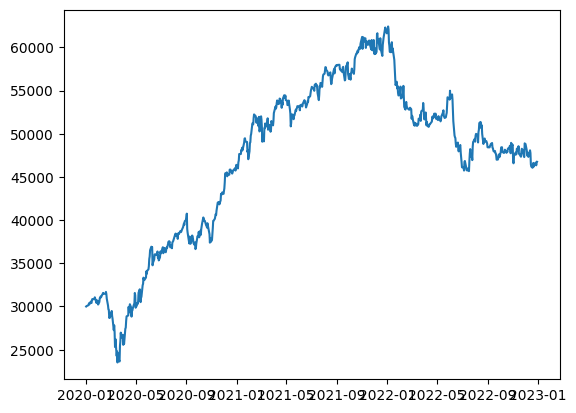

In [151]:
import matplotlib.pyplot as plt
chart = plt.subplot2grid((3, 2), (0, 0), rowspan=3, colspan=2)
chart.plot(result.portfolio.index, result.portfolio['market_value'])


